### E-Commerce Customer Purchase Prediction
#### Phase 2: Exploratory Data Analysis (EDA)

Analyzing features from Phase 1 to understand patterns and prepare for modeling

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from scipy import stats

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

Step 1: Load processed data from Phase 1

In [52]:
print("Loading processed data from Phase 1...")

X_train = pd.read_csv("data/phase_1/x_train.csv", index_col=0)
X_test = pd.read_csv("data/phase_1/x_test.csv", index_col=0)
y_train = pd.read_csv("data/phase_1/y_train.csv", index_col=0).squeeze()
y_test = pd.read_csv("data/phase_1/y_test.csv", index_col=0).squeeze()

print(f"Loaded training data: {X_train.shape}")
print(f"Loaded test data: {X_test.shape}")
print(f"Total features: {X_train.shape[1]}")
print(f"Total samples: {len(X_train) + len(X_test):,}")

X_full = pd.concat([X_train, X_test], axis=0)
y_full = pd.concat([y_train, y_test], axis=0)

print(f"Combined dataset: {X_full.shape}")
print(f"Conversion rate: {y_full.mean()*100:.2f}%")

Loading processed data from Phase 1...
Loaded training data: (497588, 36)
Loaded test data: (577996, 36)
Total features: 36
Total samples: 1,075,584
Combined dataset: (1075584, 36)
Conversion rate: 2.29%


Step 2: Data Quality Checks

In [53]:
print("Missing Values Analysis:")
missing = X_full.isnull().sum()
if missing.sum() == 0:
    print("No missing values detected")
else:
    print(f"Missing values found:")
    print(missing[missing > 0])

print("Data Types:")
print(X_full.dtypes.value_counts())

print("Infinite Values Check:")
inf_cols = []
for col in X_full.columns:
    if np.isinf(X_full[col]).any():
        inf_cols.append(col)
if len(inf_cols) == 0:
    print("No infinite values detected")
else:
    print(f"Infinite values in: {inf_cols}")

print("Zero Variance Features:")
zero_var = X_full.columns[X_full.std() == 0]
if len(zero_var) == 0:
    print("All features have variance")
else:
    print(f"Zero variance features: {list(zero_var)}")

Missing Values Analysis:
No missing values detected
Data Types:
float64    23
int64      13
Name: count, dtype: int64
Infinite Values Check:
No infinite values detected
Zero Variance Features:
All features have variance


Step 3: Summary Statistics

In [54]:
print("Overall Feature Statistics:")
summary = X_full.describe()

# Identify features with extreme skewness
print("Skewness Analysis:")
skewness = X_full.skew().sort_values(ascending=False)
print(f"Most skewed features (top 10): {skewness.head(10)}")

Overall Feature Statistics:
Skewness Analysis:
Most skewed features (top 10): sessions                470.530064
products_per_session    127.618173
cart_to_view_ratio       45.436064
views_per_session        44.540855
events_per_session       41.713661
views                    31.578493
total_events             28.725759
cart_events              21.811851
total_price_viewed       17.679900
events_per_minute        15.352799
dtype: float64


Step 4: Target Variable Analysis

Class Distribution:
will_purchase
0    1050927
1      24657
Name: count, dtype: int64
will_purchase
0    97.707571
1     2.292429
Name: proportion, dtype: float64
Train vs Test Conversion Rates:
Training set: 2.01%
Test set: 2.53%
Difference: 0.52 percentage points


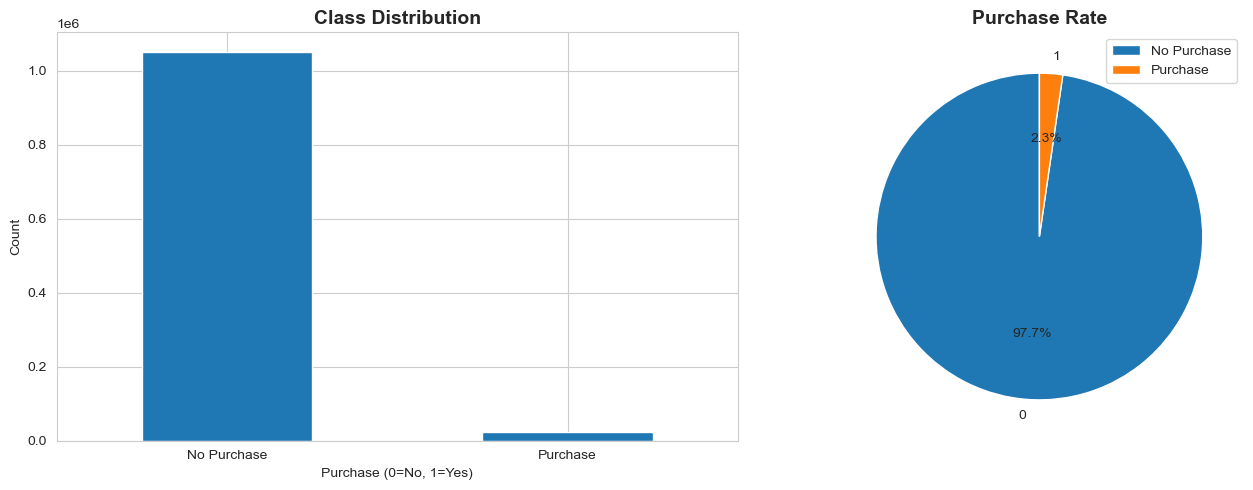

Saved: images/target_distribution.png


In [55]:
print("Class Distribution:")
print(f"{y_full.value_counts()}")
print(f"{y_full.value_counts(normalize=True) * 100}")

print("Train vs Test Conversion Rates:")
print(f"Training set: {y_train.mean()*100:.2f}%")
print(f"Test set: {y_test.mean()*100:.2f}%")
print(f"Difference: {abs(y_train.mean() - y_test.mean())*100:.2f} percentage points")

# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
y_full.value_counts().plot(kind="bar", ax=axes[0])
axes[0].set_title("Class Distribution", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Purchase (0=No, 1=Yes)")
axes[0].set_ylabel("Count")
axes[0].set_xticklabels(["No Purchase", "Purchase"], rotation=0)

# Pie chart
y_full.value_counts().plot(kind="pie", ax=axes[1], autopct="%1.1f%%", startangle=90)
axes[1].set_title("Purchase Rate", fontsize=14, fontweight="bold")
axes[1].set_ylabel("")
axes[1].legend(["No Purchase", "Purchase"], loc="best")

plt.tight_layout()
os.makedirs("images", exist_ok=True)
plt.savefig("images/target_distribution.png", dpi=300, bbox_inches="tight")
plt.show()
print("Saved: images/target_distribution.png")
plt.close()

Step 5: Feature Distribution Analysis

Visualizing 11 key features...
Saved: images/feature_distributions.png


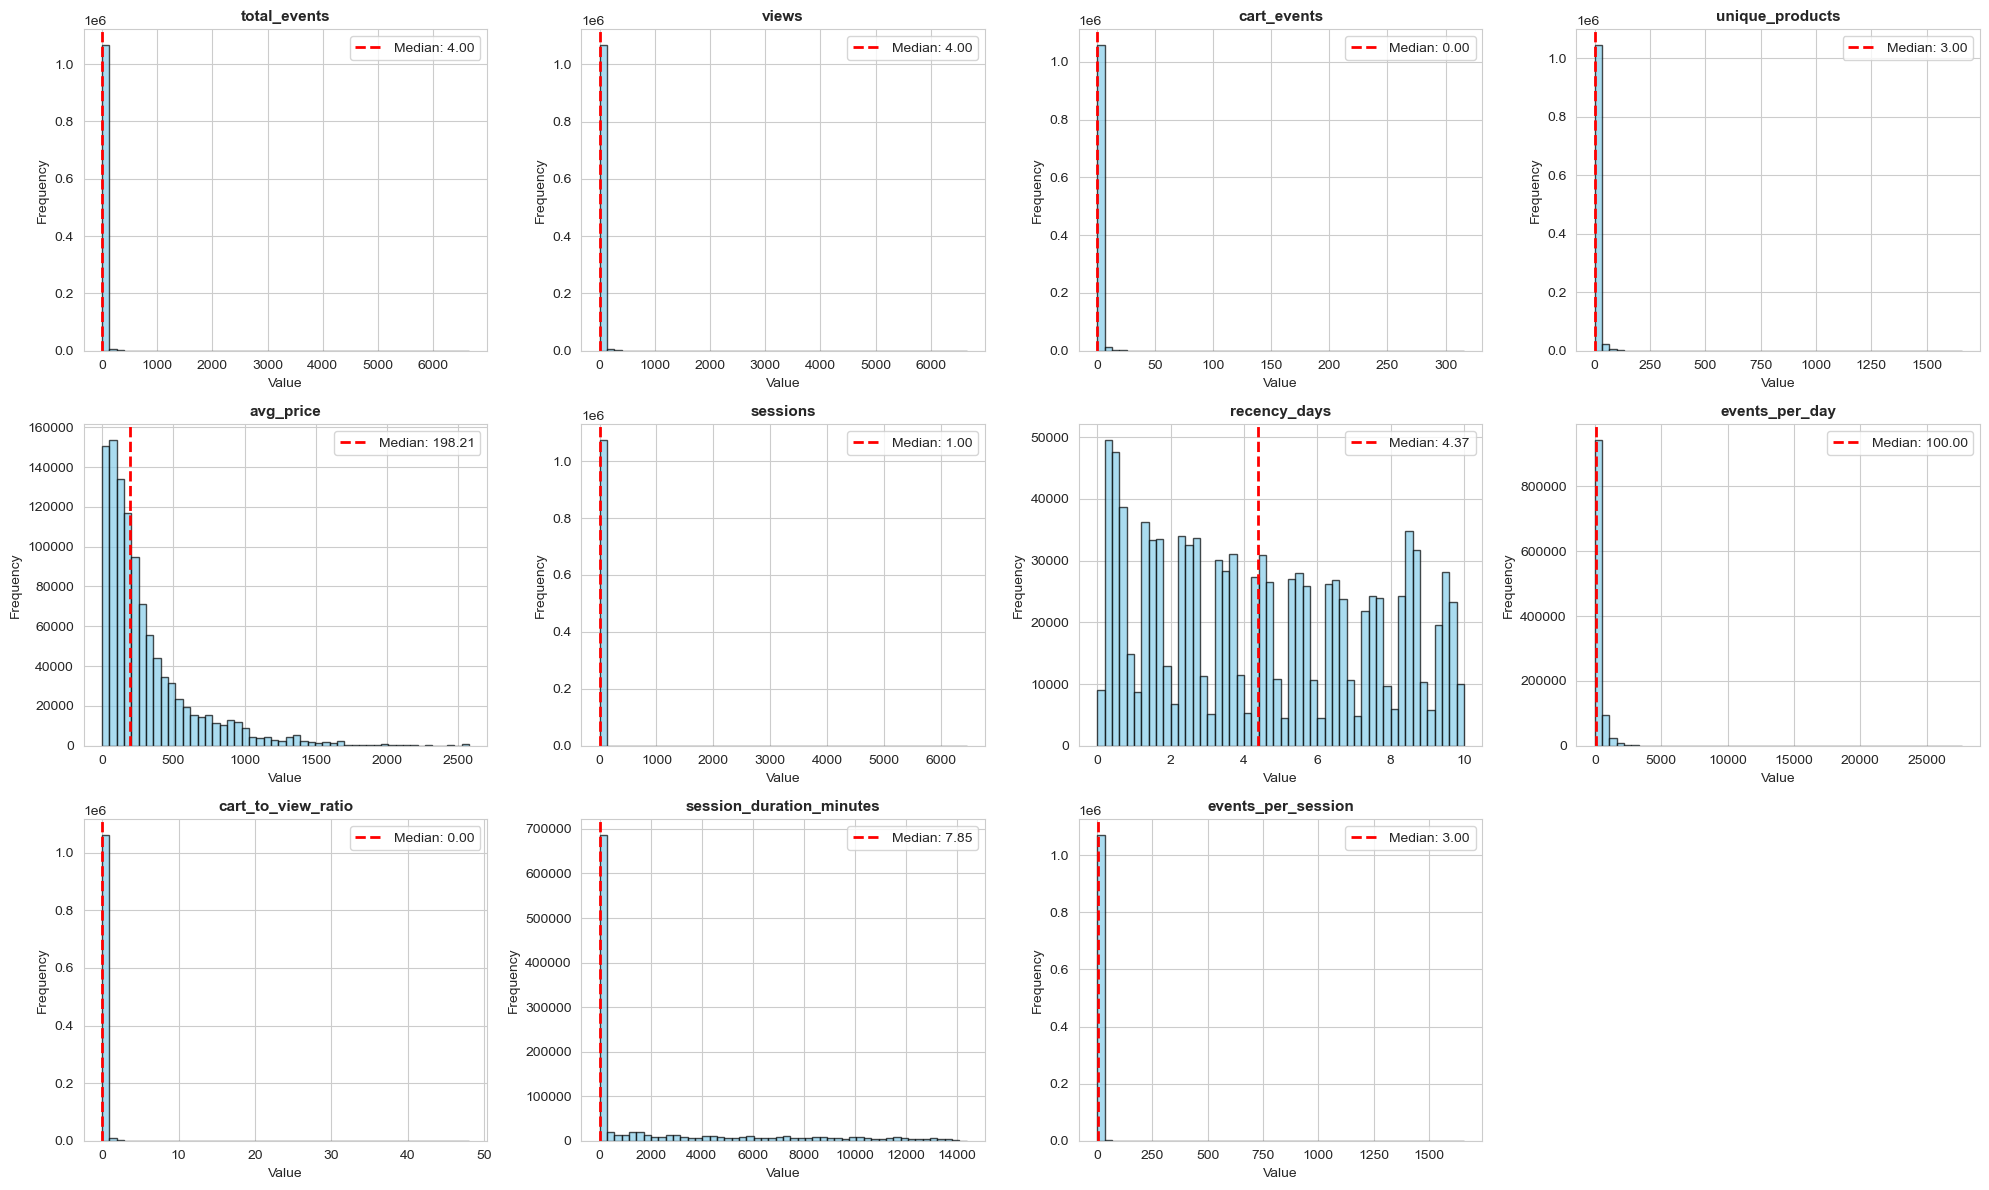

In [56]:
key_features = [
    "total_events",
    "views",
    "cart_events",
    "unique_products",
    "avg_price",
    "sessions",
    "recency_days",
    "events_per_day",
    "cart_to_view_ratio",
    "session_duration_minutes",
    "events_per_session",
]

# Filter features that exist
available_features = [f for f in key_features if f in X_full.columns]

print(f"Visualizing {len(available_features)} key features...")

# Create distribution plots
n_features = len(available_features)
n_cols = 4
n_rows = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

for i, feature in enumerate(available_features):
    # Histogram with KDE
    X_full[feature].hist(
        bins=50, ax=axes[i], alpha=0.7, color="skyblue", edgecolor="black"
    )
    axes[i].set_title(f"{feature}", fontsize=11, fontweight="bold")
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Frequency")

    # Add median line
    median_val = X_full[feature].median()
    axes[i].axvline(
        median_val,
        color="red",
        linestyle="--",
        linewidth=2,
        label=f"Median: {median_val:.2f}",
    )
    axes[i].legend()

# Hide empty subplots
for i in range(len(available_features), len(axes)):
    axes[i].axis("off")

plt.tight_layout()
plt.savefig("images/feature_distributions.png", dpi=300, bbox_inches="tight")
print("Saved: images/feature_distributions.png")
plt.show()
plt.close()

Step 6: Purchasers vs Non-Purchasers Comparison

Feature Means by Purchase Status:
                          Non-Purchasers   Purchasers     Ratio
cart_events                     0.443937     2.683214  6.044137
cart_to_view_ratio              0.045285     0.169203  3.736398
total_events                   11.784956    30.038123  2.548853
session_duration_minutes     1970.551530  4740.763683  2.405805
views                          11.180313    25.767490  2.304720
unique_products                 6.453688    12.925052  2.002739
sessions                        2.485259     4.958065  1.994989
events_per_session              4.205992     5.759798  1.369427
avg_price                     307.630904   313.537277  1.019200
events_per_day                237.322555   186.160677  0.784420
recency_days                    4.582397     3.340702  0.729029
Visualizing Top Differentiating Features:
Saved: images/purchaser_feature_comparison.png


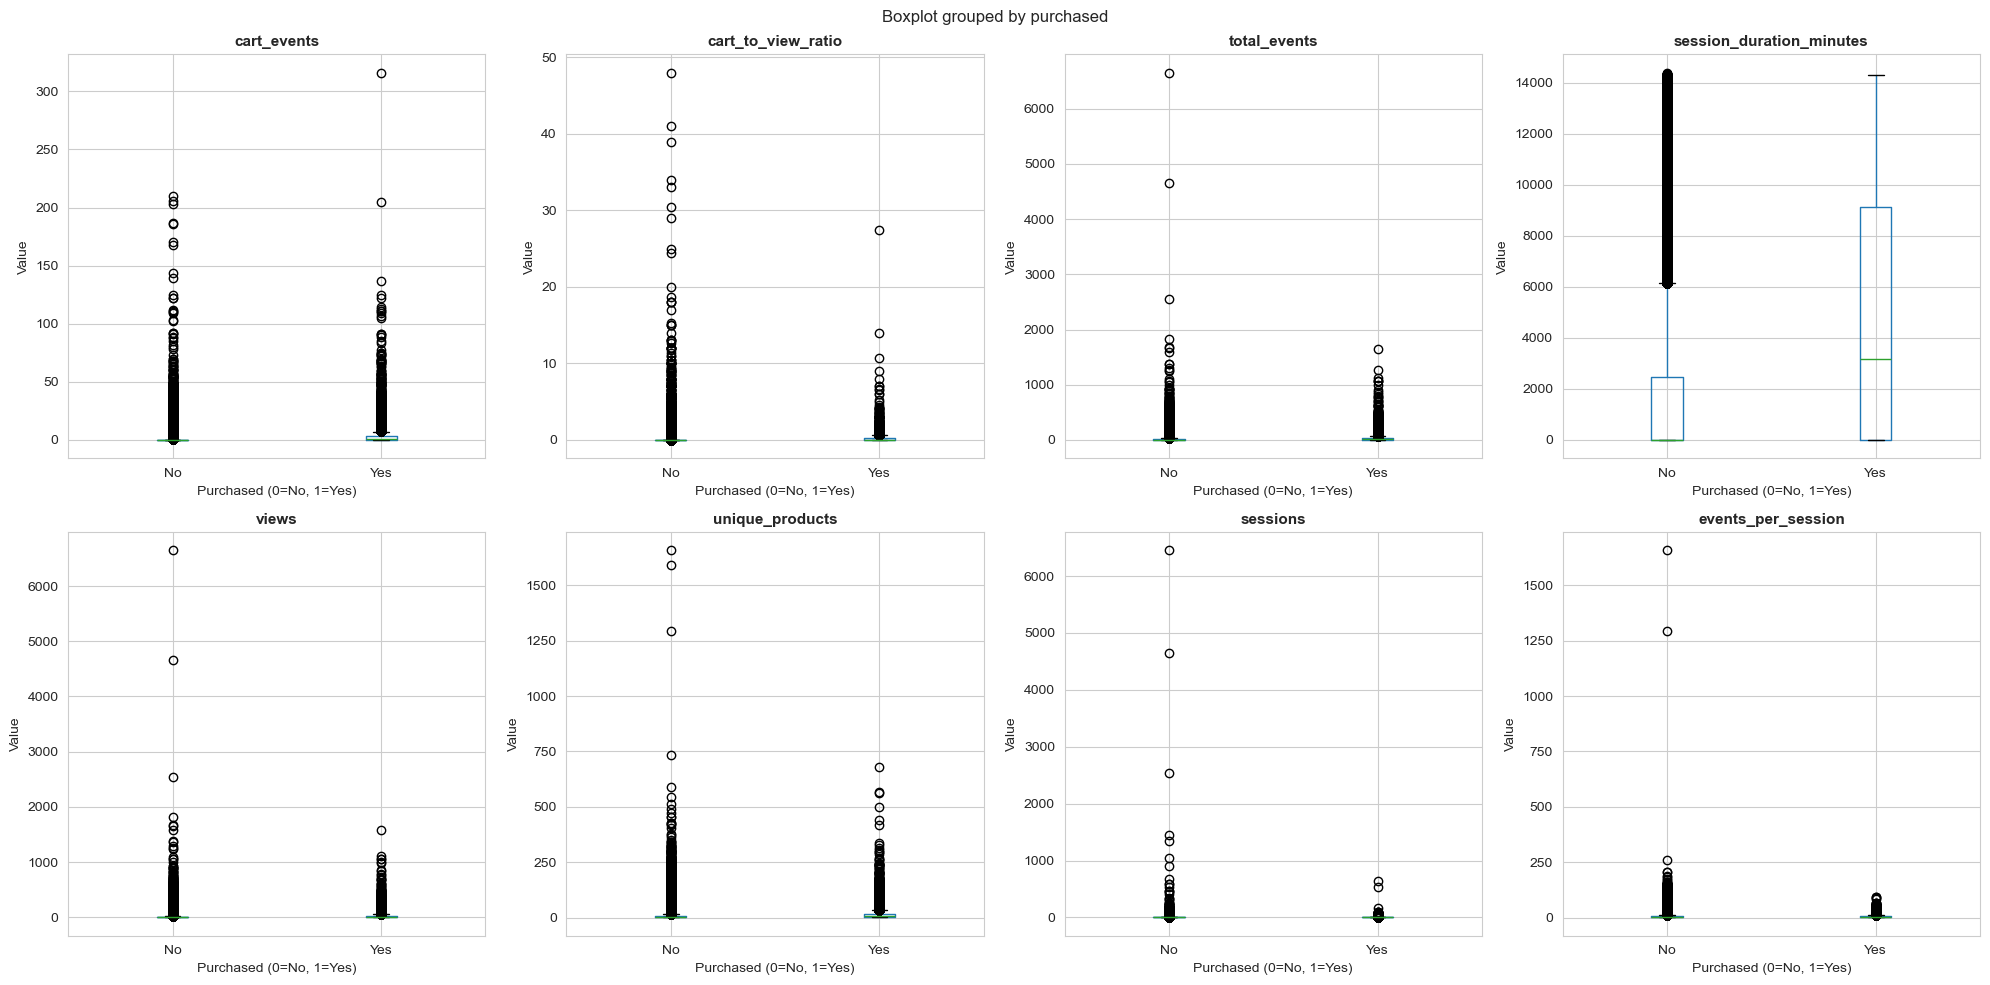

In [57]:
# Combine X and y for analysis
df_analysis = X_full.copy()
df_analysis["purchased"] = y_full

print("Feature Means by Purchase Status:")
comparison = df_analysis.groupby("purchased")[available_features].mean().T
comparison.columns = ["Non-Purchasers", "Purchasers"]
comparison["Ratio"] = comparison["Purchasers"] / comparison["Non-Purchasers"]
comparison = comparison.sort_values("Ratio", ascending=False)
print(comparison)

# Visualize top differentiating features
print("Visualizing Top Differentiating Features:")
top_features = comparison.head(8).index.tolist()

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, feature in enumerate(top_features):
    if feature in df_analysis.columns:
        # Box plot by purchase status
        df_analysis.boxplot(column=feature, by="purchased", ax=axes[i])
        axes[i].set_title(f"{feature}", fontsize=11, fontweight="bold")
        axes[i].set_xlabel("Purchased (0=No, 1=Yes)")
        axes[i].set_ylabel("Value")
        plt.sca(axes[i])
        plt.xticks([1, 2], ["No", "Yes"])

plt.tight_layout()
plt.savefig("images/purchaser_feature_comparison.png", dpi=300, bbox_inches="tight")
print("Saved: images/purchaser_feature_comparison.png")
plt.show()
plt.close()


Step 7: Correlation Analysis

Computing correlation matrix...
Highly Correlated Feature Pairs > 0.8
                   Feature_1             Feature_2  Correlation
8   session_duration_minutes           days_active     0.999999
0               total_events                 views     0.994934
6         events_per_session     views_per_session     0.991053
11            events_per_day         views_per_day     0.987843
13         events_per_minute    session_efficiency     0.947384
14         views_per_session  products_per_session     0.899196
2                      views       unique_products     0.898880
1               total_events       unique_products     0.890836
7         events_per_session  products_per_session     0.881722
3            unique_products         unique_brands     0.861999
15        unique_days_active   unique_hours_active     0.853470
4          unique_categories         unique_brands     0.837813
9   session_duration_minutes    unique_days_active     0.827071
10               days_active    un

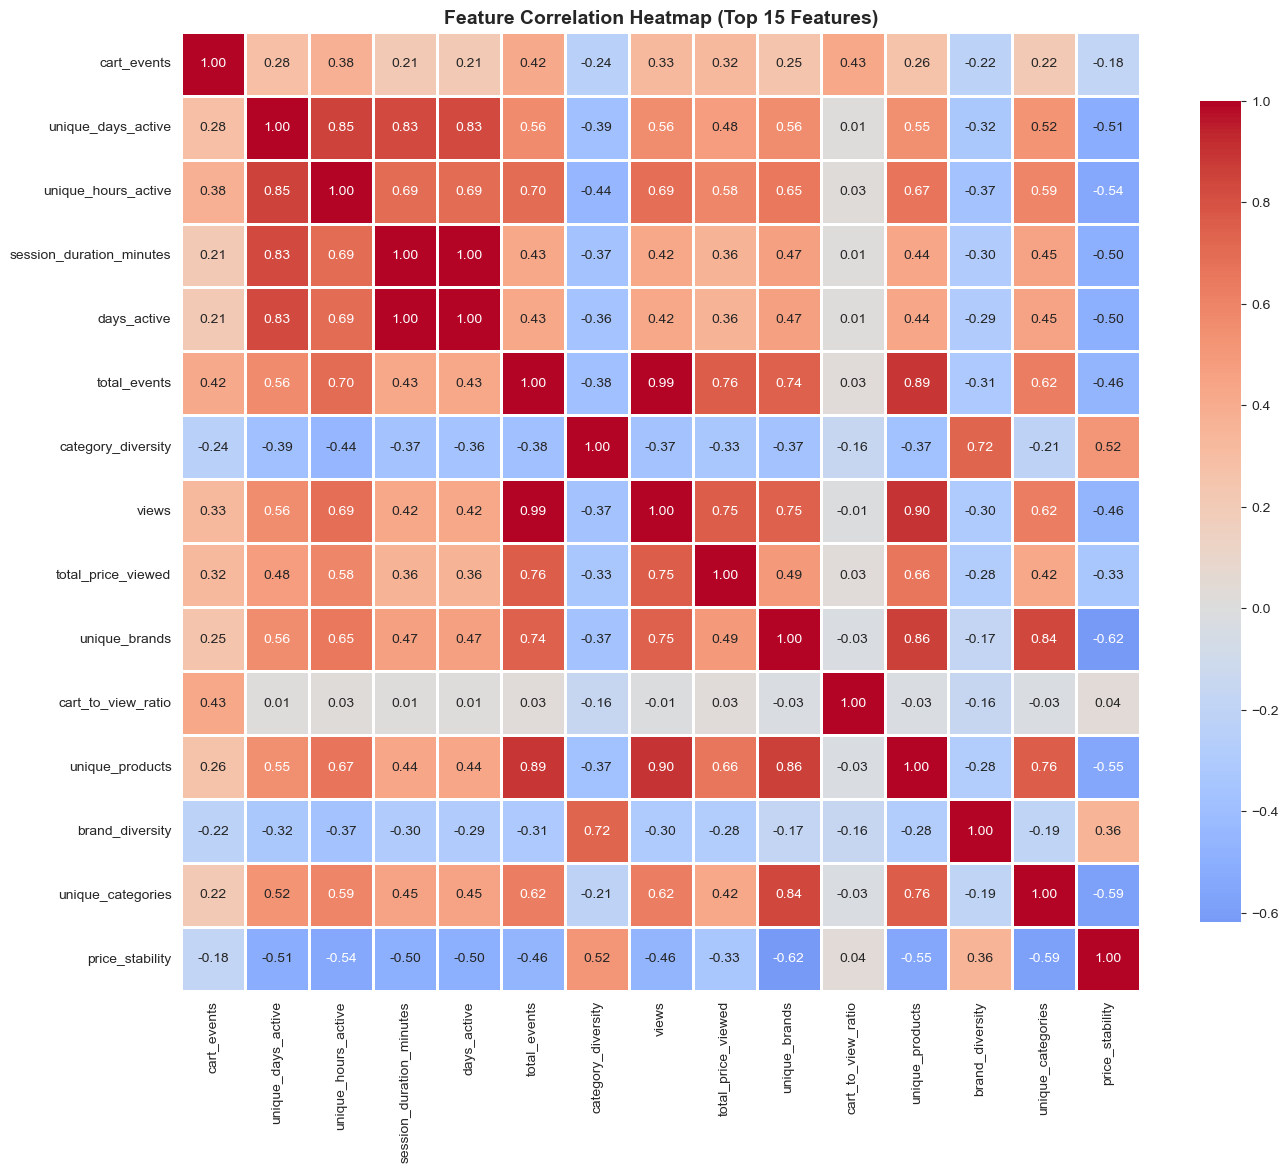

In [58]:
print("Computing correlation matrix...")
correlation_matrix = X_full.corr()

# Find highly correlated pairs
print("Highly Correlated Feature Pairs > 0.8")
high_corr_list = []
cols = correlation_matrix.columns

for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.8:
            high_corr_list.append({
                'Feature_1': cols[i],
                'Feature_2': cols[j],
                'Correlation': corr_value
            })

if high_corr_list:
    high_corr_df = pd.DataFrame(high_corr_list).sort_values('Correlation', ascending=False)
    print(high_corr_df)
else:
    print("No highly correlated pairs found")

# Correlation heatmap (top 15 features)
print("Creating correlation heatmap...")
# Select features with highest correlation to target
df_with_target = X_full.copy()
df_with_target["target"] = y_full
target_corr = (
    df_with_target.corr()["target"].drop("target").abs().sort_values(ascending=False)
)
top_corr_features = target_corr.head(15).index.tolist()

plt.figure(figsize=(14, 12))
sns.heatmap(
    X_full[top_corr_features].corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=1,
    cbar_kws={"shrink": 0.8},
)
plt.title(
    "Feature Correlation Heatmap (Top 15 Features)", fontsize=14, fontweight="bold"
)
plt.tight_layout()
plt.savefig("images/correlation_heatmap.png", dpi=300, bbox_inches="tight")
print("Saved: images/correlation_heatmap.png")
plt.show()
plt.close()

Step 8: Feature Importance (Correlation with Target)

Top 20 Features by Correlation with Purchase:
cart_events                 0.162437
unique_days_active          0.130712
unique_hours_active         0.123796
session_duration_minutes    0.116180
days_active                 0.116147
total_events                0.102881
category_diversity          0.091848
views                       0.085624
total_price_viewed          0.084964
unique_brands               0.081203
cart_to_view_ratio          0.080508
unique_products             0.079812
brand_diversity             0.079752
unique_categories           0.076942
price_stability             0.074751
sessions_per_day            0.068097
brand_loyal                 0.066270
category_focused            0.065872
recency_days                0.062644
price_range                 0.061722
Name: target, dtype: float64
Saved: images/feature_importance_correlation.png


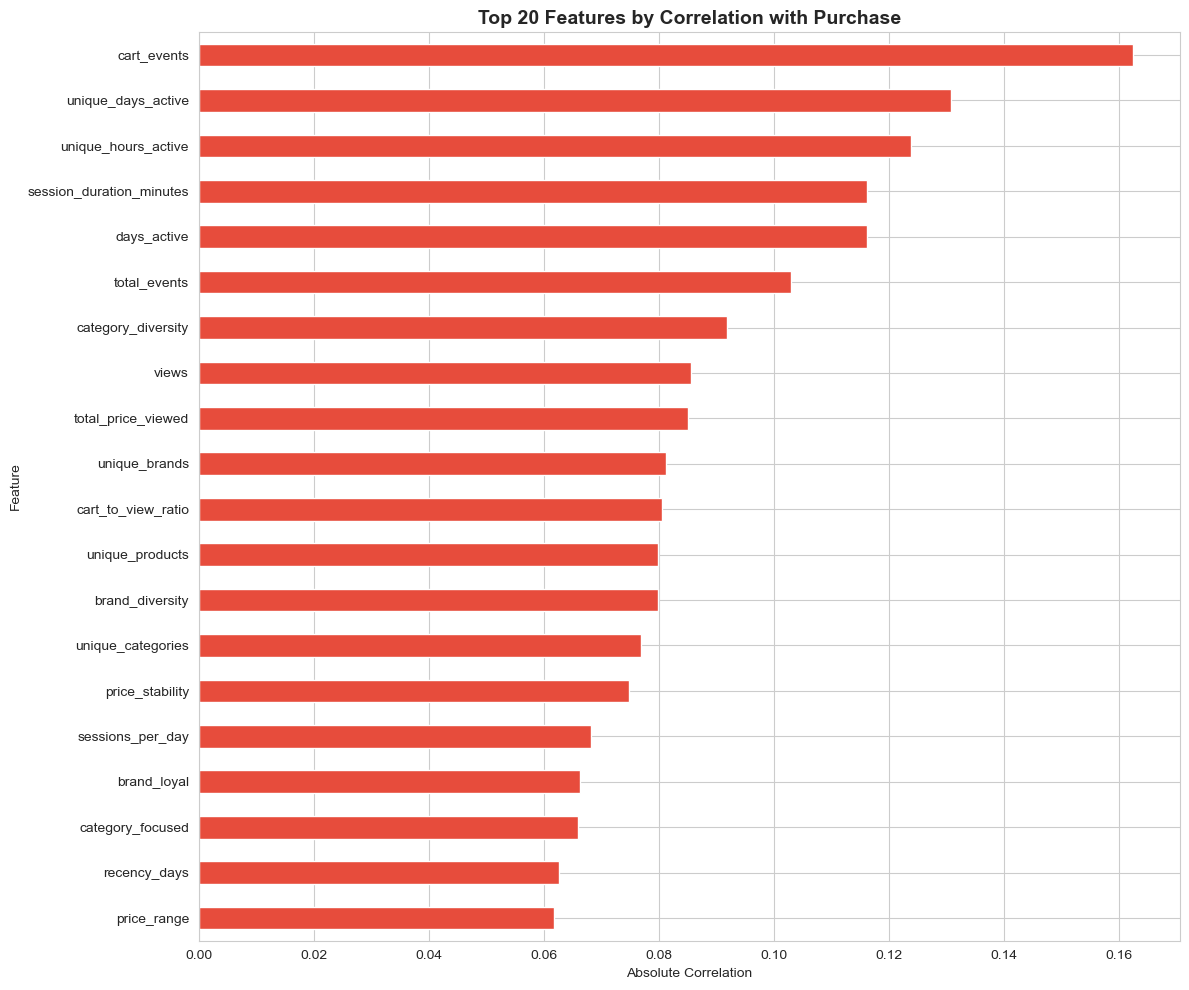

In [59]:
print("Top 20 Features by Correlation with Purchase:")
target_corr_sorted = target_corr.sort_values(ascending=False)
print(target_corr_sorted.head(20))

# Visualize feature importance
plt.figure(figsize=(12, 10))
top_20 = target_corr_sorted.head(20)
colors = ["#e74c3c" if x > 0 else "#3498db" for x in top_20.values]
top_20.plot(kind="barh", color=colors)
plt.title(
    "Top 20 Features by Correlation with Purchase", fontsize=14, fontweight="bold"
)
plt.xlabel("Absolute Correlation")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("images/feature_importance_correlation.png", dpi=300, bbox_inches="tight")
print("Saved: images/feature_importance_correlation.png")
plt.show()
plt.close()

Step 9: Cohort Analysis

In [60]:
# 1. Cart Activity (strongest signal)
df_cohort = X_full.copy()
df_cohort["purchased"] = y_full
df_cohort["cart_cohort"] = pd.cut(
    df_cohort["cart_events"],
    bins=[-1, 0, 1, 5, 100],
    labels=["No Cart", "1 Cart", "2-5 Carts", "6+ Carts"]
)
cart_conv = df_cohort.groupby("cart_cohort")["purchased"].mean() * 100
print(cart_conv)

# 2. Recency (second strongest)
df_cohort["recency_cohort"] = pd.qcut(
    df_cohort["recency_days"], q=4, duplicates="drop"
)
recency_conv = df_cohort.groupby("recency_cohort")["purchased"].mean() * 100
print(recency_conv)

cart_cohort
No Cart       1.227399
1 Cart        5.129881
2-5 Carts     7.853324
6+ Carts     15.487022
Name: purchased, dtype: float64
recency_cohort
(-0.001, 1.78]    3.939725
(1.78, 4.37]      2.266174
(4.37, 7.25]      1.566918
(7.25, 10.0]      1.388956
Name: purchased, dtype: float64


Summary
1. Overall conversion rate: 2.29%
2. Class imbalance ratio: 42.6:1 (need to address in modeling)
3. Top 3 predictive features:
   - cart_events: 0.162 correlation
   - unique_days_active: 0.131 correlation
   - unique_hours_active: 0.124 correlation
4. Data quality: 36 features, no missing values
5. Feature engineering created 